In [1]:
#Importar librerias.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Cargar datos. 
df=pd.read_csv("/home/jovyan/Tesis/TethaF.csv")
df

,h,Tilt angle β,δ (declinación),cos(θ) formula 1,cos(θ) formula 2,A,Latitude φ,cos(δ),sin(δ),cos(β),sin(β),cos(ω),sin(ω),cos(y),sin(y),cos(φ),sin(φ)
0,1,0,-23.011637,0.368896,0.735362,0,19.32361,0.920425,-0.390918,1,0,0.995562,0.094108,1,0,0.943665,0.330903
1,2,0,-22.930544,0.367666,0.736312,0,19.32361,0.920978,-0.389615,1,0,0.995562,0.094108,1,0,0.943665,0.330903
2,3,0,-22.842656,0.366332,0.737340,0,19.32361,0.921574,-0.388202,1,0,0.995562,0.094108,1,0,0.943665,0.330903
3,4,0,-22.747999,0.364895,0.738446,0,19.32361,0.922214,-0.386679,1,0,0.995562,0.094108,1,0,0.943665,0.330903
4,5,0,-22.646602,0.363354,0.739628,0,19.32361,0.922897,-0.385046,1,0,0.995562,0.094108,1,0,0.943665,0.330903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,0,-23.354300,0.374084,0.731331,0,19.32361,0.918071,-0.396416,1,0,0.995562,0.094108,1,0,0.943665,0.330903
360,361,0,-23.314410,0.373480,0.731802,0,19.32361,0.918347,-0.395776,1,0,0.995562,0.094108,1,0,0.943665,0.330903
361,362,0,-23.267611,0.372772,0.732353,0,19.32361,0.918670,-0.395026,1,0,0.995562,0.094108,1,0,0.943665,0.330903
362,363,0,-23.213917,0.371960,0.732986,0,19.32361,0.919040,-0.394165,1,0,0.995562,0.094108,1,0,0.943665,0.330903


In [3]:
#Convertir la columna "h" en índice.
df.index=df.h
df=df.drop('h',axis=1)

In [4]:
#Seleccionar únicamente la columna cos (0) formula 2. 
column=df["cos(θ) formula 2"]

In [5]:
#Generar un nuevo df con las columnas que nos interesan.
df2= {"Días": np.arange(1,365),"cos":column}
df3 = pd.DataFrame(df2)

In [6]:
#Generar el df definitivo con el índice de 1 a 365 y con la columna seleccionada.
df3.index=df3.Días
df3=df3.drop('Días',axis=1)

In [16]:
#Generar slices para cada mes, considerando la numeración seleccionada en el índice. 
df_ene=df3.loc[df3.index<32]
df_feb=df3.loc[(df3.index>=32) & (df3.index<=59)]
df_mar=df3.loc[(df3.index>=60) & (df3.index<=90)]
df_abr=df3.loc[(df3.index>=91) & (df3.index<=120)]
df_may=df3.loc[(df3.index>=121) & (df3.index<=151)]
df_jun=df3.loc[(df3.index>=152) & (df3.index<=181)]
df_jul=df3.loc[(df3.index>=182) & (df3.index<=212)]
df_ago=df3.loc[(df3.index>=213) & (df3.index<=243)]
df_sep=df3.loc[(df3.index>=244) & (df3.index<=273)]
df_oct=df3.loc[(df3.index>=274) & (df3.index<=304)]
df_nov=df3.loc[(df3.index>=305) & (df3.index<=334)]
df_dic=df3.loc[(df3.index>=335) & (df3.index<=365)]

In [10]:
#Obtener el promedio por mes de los valores presentes en cada slice.
df_enef = df_ene["cos"].mean()
df_febf = df_feb["cos"].mean()
df_marf = df_mar["cos"].mean()
df_abrf = df_abr["cos"].mean()
df_mayf = df_may["cos"].mean()
df_junf = df_jun["cos"].mean()
df_julf = df_jul["cos"].mean()
df_agof = df_ago["cos"].mean()
df_sepf = df_sep["cos"].mean()
df_octf = df_oct["cos"].mean()
df_novf = df_nov["cos"].mean()
df_dicf = df_dic["cos"].mean()

0.7599209964193548


In [22]:
#Establecer el área, la eficiencia del modelo de panel fotovoltaico seleccionado (23.3%) y los cuantiles calculados
#con base en la base de datos perteneciente a la ROUA.
a = 1000 #area 
ef = 0.233 #eficiencia del panel 
qene=[4031.41, 4896.74, 5765.40] #QS de irradiancia w/m^2
qfeb=[5048.50, 5901.70, 6636.49]
qmar=[5577.14, 6526.70, 7173.30]
qabr=[5586.60, 6320.90, 7218.00]
qmay=[5309.90, 6234.50, 6933.12]
qjun=[4358.55, 5712.90, 6980.62]
qjul=[4368.49, 5455.83, 6475.32]
qago=[4445.10, 5413.00, 6175.70]
qsep=[3639.54, 4605.70, 5523.45]
qoct=[3775.40, 4922.95, 5918.26]
qnov=[3873.32, 5103.45, 5732.40]
qdic=[4001.19, 4816.86, 5745.57]

In [27]:
#Calcular la producción del sistema de paneles fotovoltaicos por mes y con base en las fórmulas seleccionadas. 
Qsene = []
for ii in qene:
    irr = (ii*df_enef*a*ef)/1000000
    Qsene.append(round(irr,2))

Qsfeb = []
for aa in qfeb:
    irr1 =(aa*df_febf*a*ef)/1000000
    Qsfeb.append(round(irr1,2))

Qsmar=[]
for cc in qmar:
    irr2 =(cc*df_marf*a*ef)/1000000
    Qsmar.append(round(irr2,2))

Qsabr = []
for ee in qabr:
    irr3 =(ee*df_abrf*a*ef)/1000000
    Qsabr.append(round(irr3,2))

Qsmay = []
for gg in qmay:
    irr4 =(gg*df_mayf*a*ef)/1000000
    Qsmay.append(round(irr4,2))

Qsjun = []
for jj in qjun:
    irr5 =(jj*df_junf*a*ef)/1000000
    Qsjun.append(round(irr5,2))

Qsjul = []
for mm in qjul:
    irr6 = (mm*df_julf*a*ef)/1000000
    Qsjul.append(round(irr6,2))

Qsago = []
for oo in qago:
    irr7 =(oo*df_agof*a*ef)/1000000
    Qsago.append(round(irr7,2))

Qssep = []
for qq in qsep:
    irr8 =(qq*df_sepf*a*ef)/1000000
    Qssep.append(round(irr8,2))

Qsoct = []
for rr in qoct:
    irr9 =(rr*df_octf*a*ef)/1000000
    Qsoct.append(round(irr9,2))

Qsnov = []
for tt in qnov:
    irr10 =(tt*df_novf*a*ef)/1000000
    Qsnov.append(round(irr10,2))

Qsdic = []
for vv in qdic:
    irr11 =(vv*df_dicf*a*ef)/1000000
    Qsdic.append(round(irr11,2))

In [28]:
#Separar en una variable los Q1, en otra los Q2 y en otra los Q3.
Q1=np.array([Qsene[0],Qsfeb[0],Qsmar[0],Qsabr[0],Qsmay[0],Qsjun[0],Qsjul[0],Qsago[0],Qssep[0],Qsoct[0],Qsnov[0],Qsdic[0]])
Q2=np.array([Qsene[1],Qsfeb[1],Qsmar[1],Qsabr[1],Qsmay[1],Qsjun[1],Qsjul[1],Qsago[1],Qssep[1],Qsoct[1],Qsnov[1],Qsdic[1]])
Q3=np.array([Qsene[2],Qsfeb[2],Qsmar[2],Qsabr[2],Qsmay[2],Qsjun[2],Qsjul[2],Qsago[2],Qssep[2],Qsoct[2],Qsnov[2],Qsdic[2]])

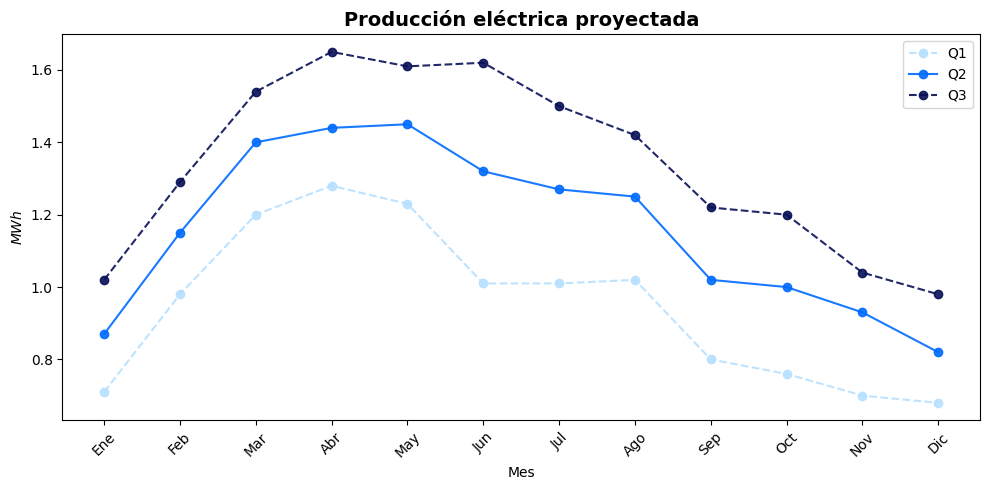

In [29]:
#Generar una variable que contenga los 12 meses del año para su posterior utilización en el eje X.
mes = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

#Crear la figura. 
fig, ax = plt.subplots(figsize=(10, 5))

#Generar un gráfico de tres líneas, una por cuantil. 
plt.plot(mes, Q1, color='#B7E0FF', marker = "o", linestyle='--', alpha=0.9, label="Q1")  
plt.plot(mes, Q2, color='#006BFF', marker='o', linestyle='-', alpha=0.9,label="Q2")  
plt.plot(mes, Q3, color='#091057', marker = "o",linestyle='--', alpha=0.9,label="Q3")  

#Configurar la vista del gráfico general. 
plt.title("Producción eléctrica proyectada", fontsize = 14, fontweight = "bold")
plt.ylabel(r'$MWh$');
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

#plt.savefig("ProdElect_Proy.svg", format="svg")
plt.show()